In [2]:

#Manejo de datos
import pandas as pd
import numpy as np

clientes = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Churn_Modelling.csv")
print(f"Fila de clientes: {clientes.shape[0]}\nColumna de clientes: {clientes.shape[1]}\nTamaño del DataFrame {clientes.size}\n\n")
clientes.head()

clientes.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
#Se borraron las columnas 

Fila de clientes: 10002
Columna de clientes: 14
Tamaño del DataFrame 140028




In [3]:

clientes.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,608,Spain,NaN,41.0,1,83807.86,25,0,1,112542.58,0
3,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0


In [4]:
clientes.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,608,Spain,NaN,41.0,1,83807.86,25,0,1,112542.58,0
3,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
6,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
7,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
8,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
9,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0


In [5]:
#SIMULAR DATOS

np.random.seed(42)

data = {
    "Estudiantes" : [f"Estudiante {i}" for i in range(1, 21)],
    "Género" : np.random.choice(["Femenino", "Masculino"], size=20),
    "Edad" : np.random.randint(18, 25, size=20),
    "Matematicas" : np.random.normal(70, 10, size=20).round(1),
    "Ciencias" : np.random.normal(63, 15, size=20).round(1),
    "Sociales" : np.random.normal(68, 13, size=20).round(1)
}

df = pd.DataFrame(data)


df["Estudiantes"] = df["Estudiantes"].astype(str)

df.dtypes


Estudiantes     object
Género          object
Edad             int32
Matematicas    float64
Ciencias       float64
Sociales       float64
dtype: object

In [6]:
print(f"Descripcion estadística:\n{df.describe(include=object)}")

Descripcion estadística:
         Estudiantes    Género
count             20        20
unique            20         2
top     Estudiante 1  Femenino
freq               1        13


In [7]:
contarGenero = df["Género"].value_counts()
print(f"Femenino: {contarGenero["Femenino"]}\nMasculino: {contarGenero["Masculino"]}\nTotal: {sum(contarGenero)}")
total = sum(contarGenero)

Femenino: 13
Masculino: 7
Total: 20


In [8]:
print(f"Femenino: {contarGenero["Femenino"]*100/total}\nMasculino: {contarGenero["Masculino"]*100/total}")

Femenino: 65.0
Masculino: 35.0


<BarContainer object of 2 artists>

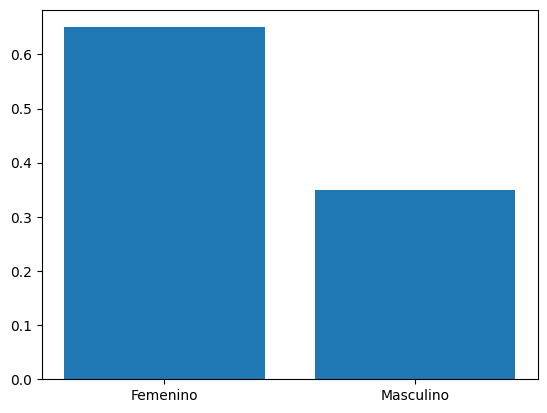

In [11]:
from matplotlib import pyplot as plt

cantidad = df["Género"].value_counts(normalize=True)

plt.bar(cantidad.index, cantidad.values)

<Axes: ylabel='Porcentaje de Género de estudiantes'>

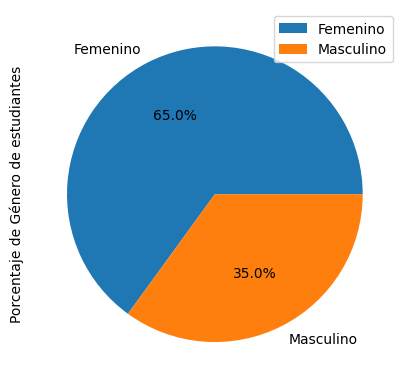

In [13]:
cantidad.plot(kind="pie", autopct="%1.1f%%", color=["red", "black"], legend=True,ylabel="Porcentaje de Género de estudiantes")

In [14]:
df.Género.unique()

array(['Femenino', 'Masculino'], dtype=object)

In [15]:
df.Género.nunique()

2

In [23]:
desvEdad=df.describe(include="integer").T["std"]["Edad"]

In [24]:
desvEdad

np.float64(1.8994459025837258)

In [25]:
df.Matematicas.median()


np.float64(66.7)

In [26]:
df.Matematicas.std()

np.float64(9.288525745580715)

<Axes: >

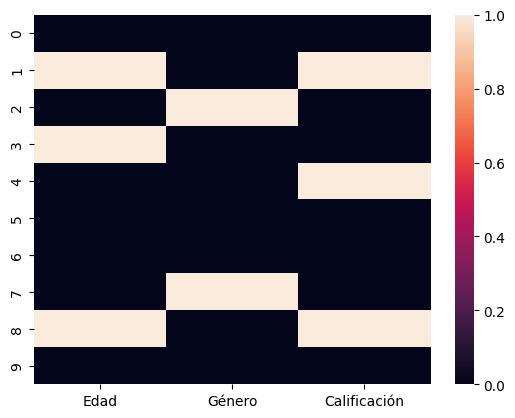

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataset simulado
data = {
    "Edad": [23, np.nan, 21, np.nan, 25, 19, 18, 20, np.nan, 22],
    "Género": ["F", "M", np.nan, "M", "F", "F", "M", np.nan, "F", "M"],
    "Calificación": [85, np.nan, 78, 88, np.nan, 92, 75, 80, np.nan, 77],
}

df = pd.DataFrame(data)

dfcopy = df

dfcopy = dfcopy.isna()

sns.heatmap(dfcopy)

In [ ]:
df["Edad"] = df["Edad"].ffill()
df


,Edad,Género,Calificación
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

df["Calificación"] = imputer.fit_transform(df[["Calificación"]])



,Edad,Género,Calificación
0,23.0,F,85.000000
1,23.0,M,82.142857
2,21.0,M,78.000000
3,21.0,M,88.000000
4,25.0,F,82.142857
5,19.0,F,92.000000
6,18.0,M,75.000000
7,20.0,F,80.000000
8,20.0,F,82.142857
9,22.0,M,77.000000


In [ ]:
df["Género"]  = df["Género"].ffill()

df["Género"].isna().sum()

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)

genero_onehot_encoded = encoder.fit_transform(df[["Género"]])
genero_onehot_encoded



array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [43]:
onehot_df = pd.DataFrame(genero_onehot_encoded, columns=encoder.get_feature_names_out(["Género"]))
onehot_df.drop(columns=["Género_F"], axis=1, inplace=True)
onehot_df

,Género_M
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,0.0
9,1.0


In [47]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="mean")

imputedCalificacion = impute.fit_transform(df[["Calificacion"]])

df.Calificación = imputedCalificacion

df.Edad.ffill(inplace=True)

df


KeyError: "None of [Index(['Calificacion'], dtype='object')] are in the [columns]"